In [13]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [14]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [27]:
# Training parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256
display_step = 1000
examples_to_show = 10

# Network parameters
num_hidden_1 = 256
num_hidden_2 = 128
num_input = 784


In [19]:
X = tf.placeholder("float", [None, num_input])
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [20]:
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2



In [21]:
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

In [22]:
y_pred = decoder_op
y_true = X

In [23]:
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

In [24]:
init = tf.global_variables_initializer()

Step 1: Minibatch Loss: 0.448679
Step 1000: Minibatch Loss: 0.143697
Step 2000: Minibatch Loss: 0.124706
Step 3000: Minibatch Loss: 0.113970
Step 4000: Minibatch Loss: 0.104694
Step 5000: Minibatch Loss: 0.101202
Step 6000: Minibatch Loss: 0.097732
Step 7000: Minibatch Loss: 0.094326
Step 8000: Minibatch Loss: 0.091994
Step 9000: Minibatch Loss: 0.088466
Step 10000: Minibatch Loss: 0.085001
Step 11000: Minibatch Loss: 0.084774
Step 12000: Minibatch Loss: 0.081447
Step 13000: Minibatch Loss: 0.083900
Step 14000: Minibatch Loss: 0.081000
Step 15000: Minibatch Loss: 0.079187
Step 16000: Minibatch Loss: 0.078356
Step 17000: Minibatch Loss: 0.074134
Step 18000: Minibatch Loss: 0.074694
Step 19000: Minibatch Loss: 0.074609
Step 20000: Minibatch Loss: 0.075475
Step 21000: Minibatch Loss: 0.070860
Step 22000: Minibatch Loss: 0.070999
Step 23000: Minibatch Loss: 0.070310
Step 24000: Minibatch Loss: 0.070035
Step 25000: Minibatch Loss: 0.068102
Step 26000: Minibatch Loss: 0.067279
Step 27000: Mi

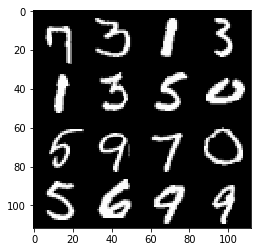

Reconstructed Images


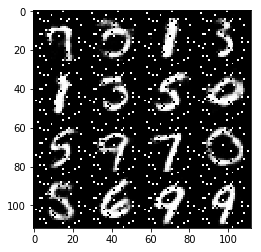

In [28]:
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training
    for i in range(1, num_steps+1):
        # Prepare Data
        # Get the next batch of MNIST data (only images are needed, not labels)
        batch_x, _ = mnist.train.next_batch(batch_size)

        # Run optimization op (backprop) and cost op (to get loss value)
        _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
        # Display logs per step
        if i % display_step == 0 or i == 1:
            print('Step %i: Minibatch Loss: %f' % (i, l))

    # Testing
    # Encode and decode images from test set and visualize their reconstruction.
    n = 4
    canvas_orig = np.empty((28 * n, 28 * n))
    canvas_recon = np.empty((28 * n, 28 * n))
    for i in range(n):
        # MNIST test set
        batch_x, _ = mnist.test.next_batch(n)
        # Encode and decode the digit image
        g = sess.run(decoder_op, feed_dict={X: batch_x})

        # Display original images
        for j in range(n):
            # Draw the original digits
            canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                batch_x[j].reshape([28, 28])
        # Display reconstructed images
        for j in range(n):
            # Draw the reconstructed digits
            canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = \
                g[j].reshape([28, 28])

    print("Original Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_orig, origin="upper", cmap="gray")
    plt.show()

    print("Reconstructed Images")
    plt.figure(figsize=(n, n))
    plt.imshow(canvas_recon, origin="upper", cmap="gray")
    plt.show()
        